# Example raw ADCP data handling

In [1]:
# %load /Users/Gunnar/Projects/python/standard_imports_ipython.py
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
from pycurrents.adcp.rdiraw import Multiread


# import own modules (install from https://github.com/gunnarvoet/pythonlib))
import gvpy as gv

%reload_ext autoreload
%autoreload 2

plt.ion()

%config InlineBackend.figure_format = 'retina'

In [2]:
rawfile = '/Users/gunnar/Projects/fleat/cruises/RR1708/processing/ladcp_towyo/split_updn/dn003_030.rdi'

Use gvpy routine

In [127]:
adcp = gv.io.read_raw_rdi(rawfile)

Read only auxillary data

In [128]:
aux = gv.io.read_raw_rdi(rawfile, auxillary_only=True)

Plot all raw data

saving to fig/


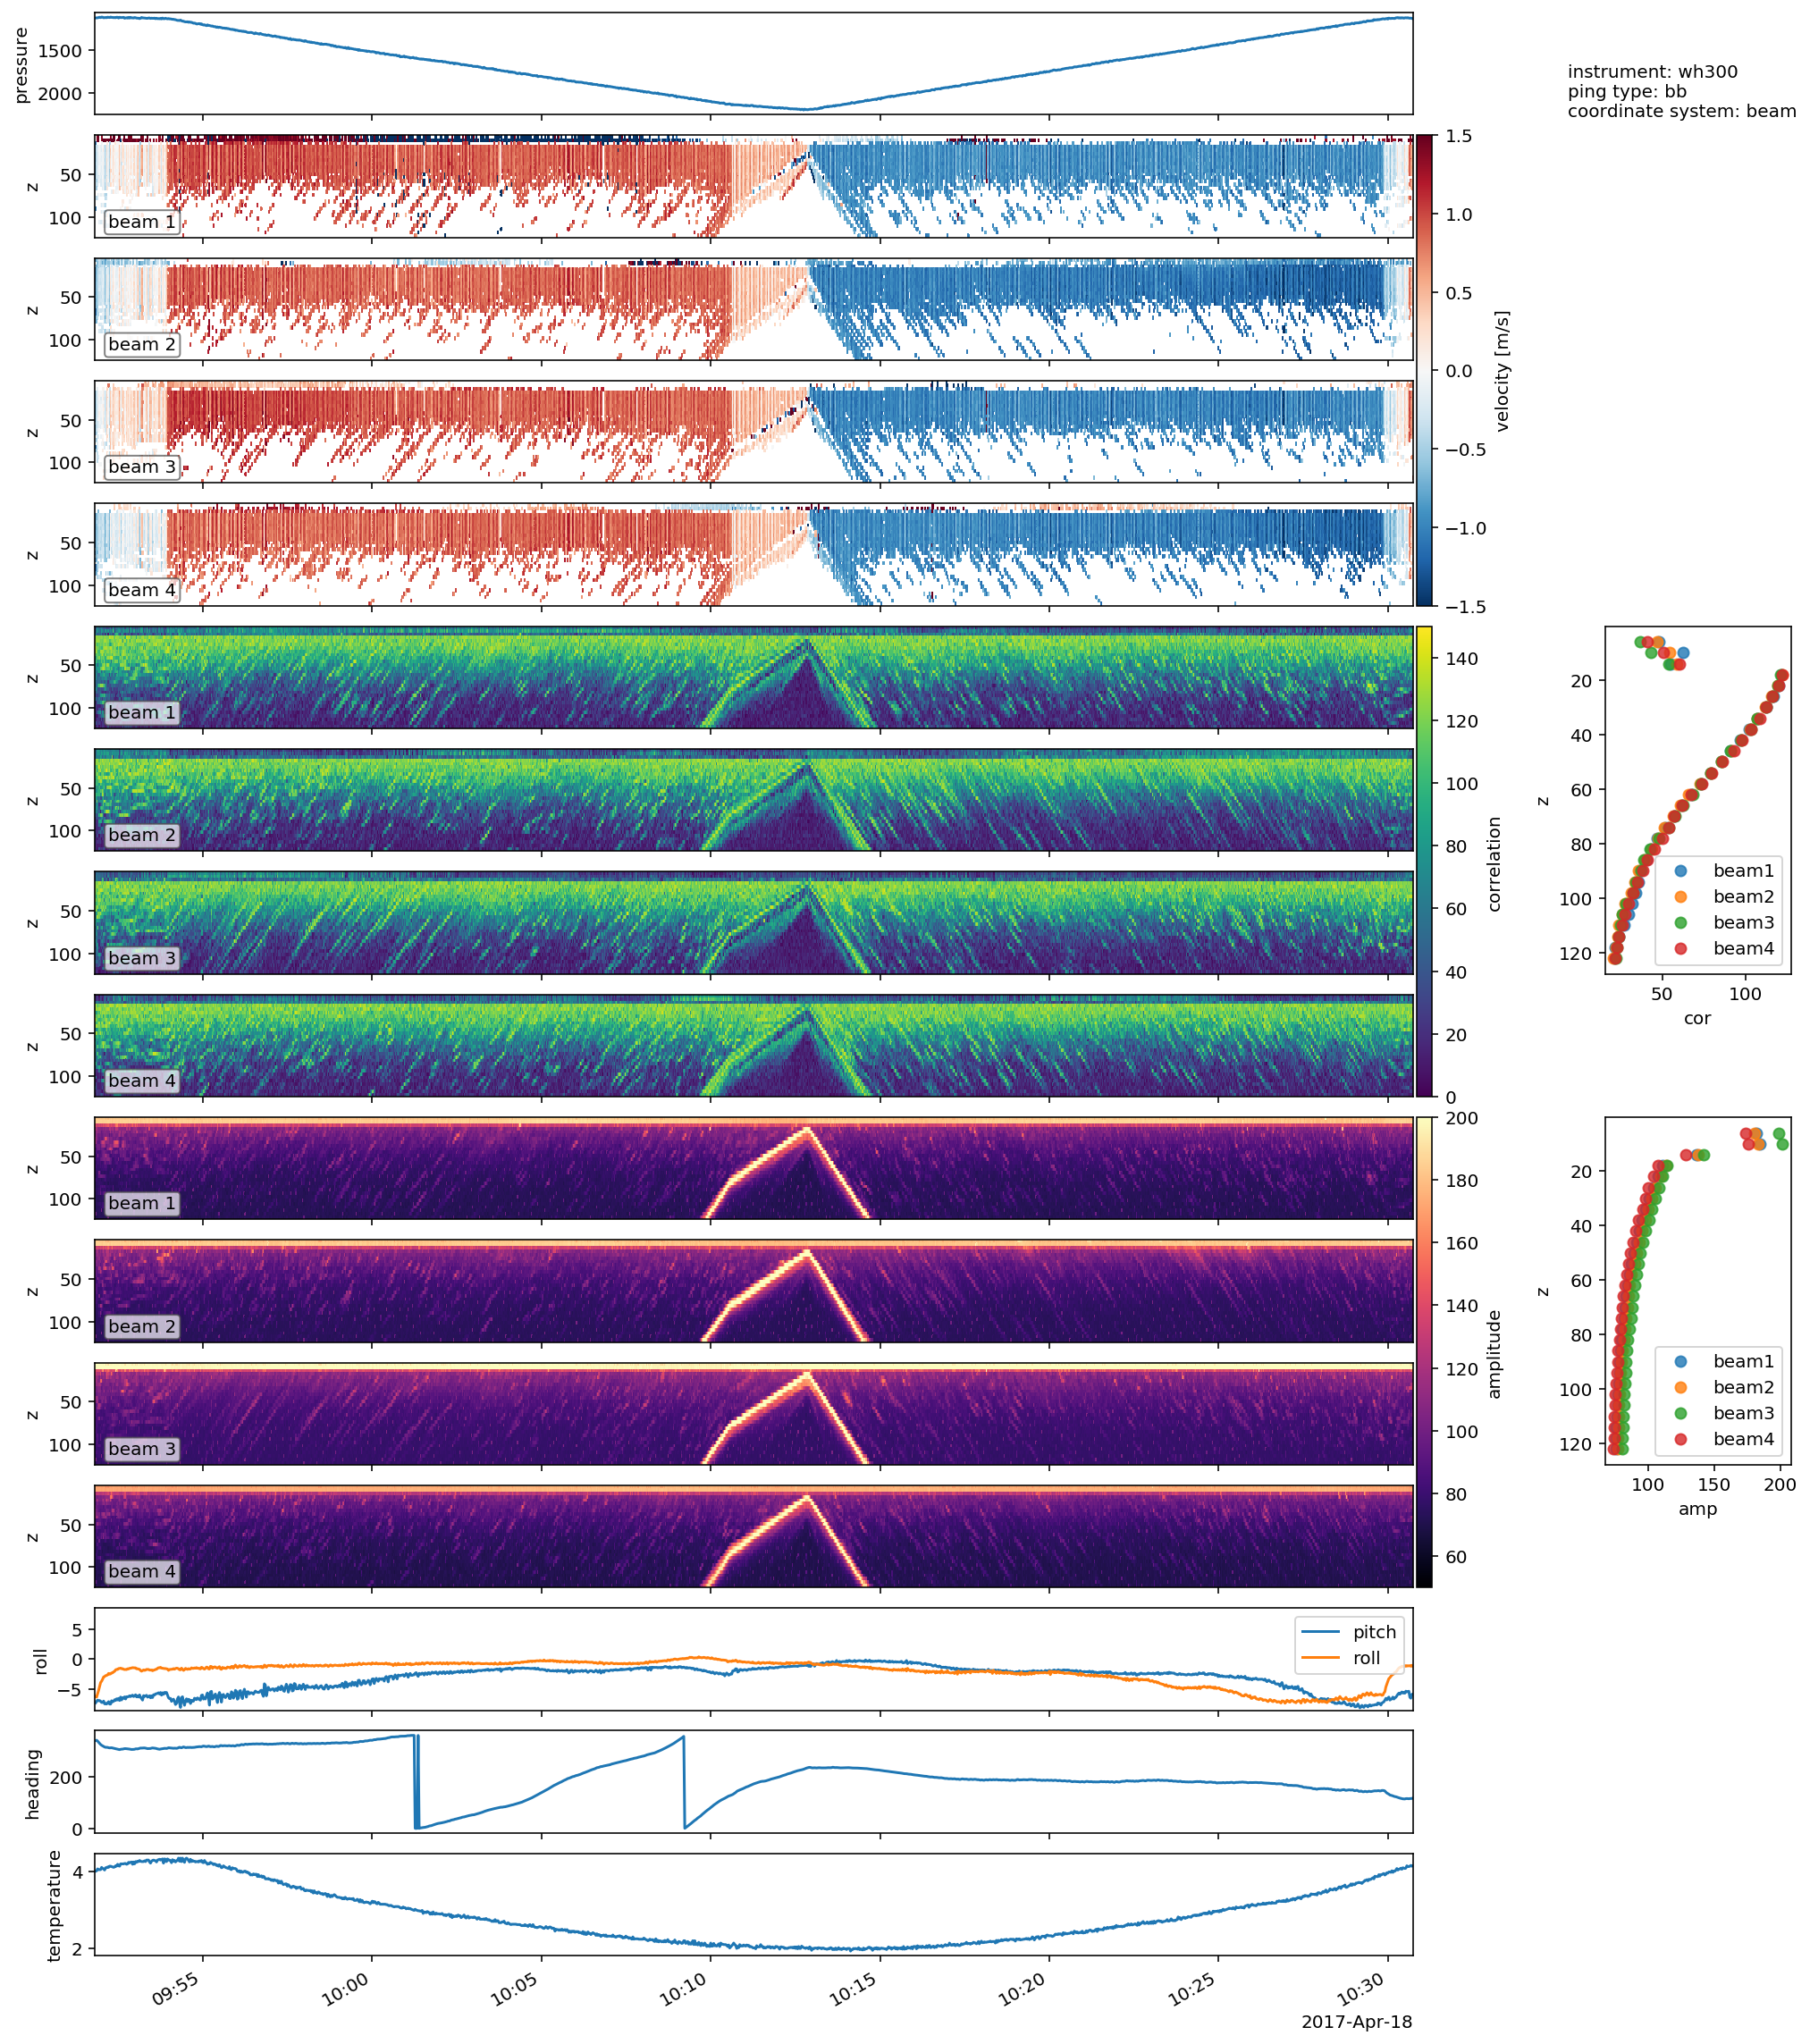

In [134]:
gv.adcp.plot_raw_adcp(test)
gv.figure.png('test2')

Plot only auxillary and time-mean quantities.

saving to fig/


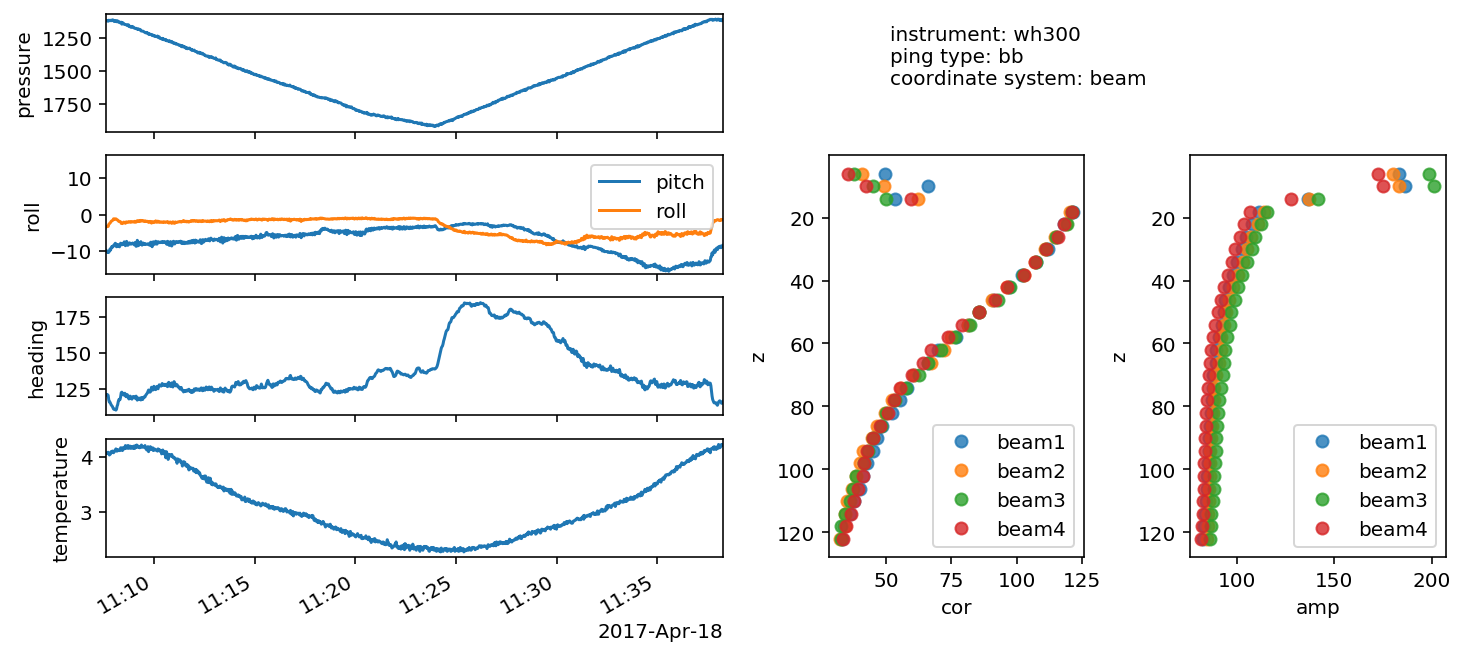

In [130]:
gv.adcp.plot_raw_adcp_auxillary(adcp)
gv.figure.png('test3')

Bottom tracking data

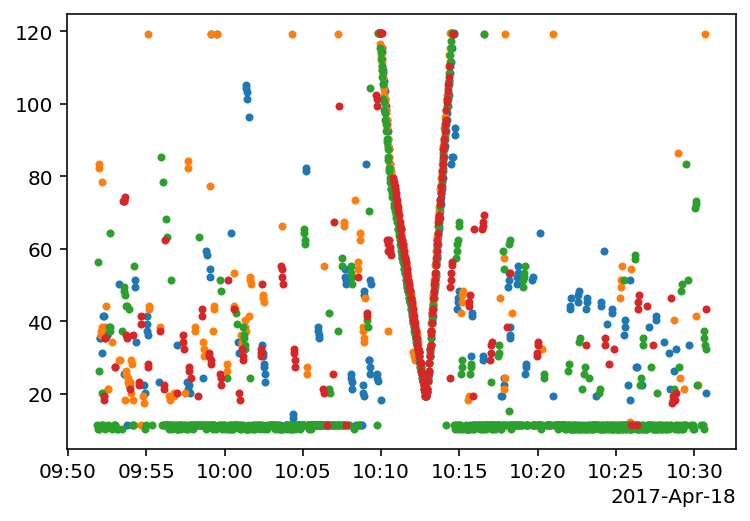

In [125]:
[plt.plot(adcp.time, grp.data, marker='.', linestyle='') for g, grp in adcp.bt_depth.groupby('beam')]
gv.figure.concise_date()

UH routines

In [10]:
m = Multiread(rawfile, 'wh')

In [122]:
adcpr = m.read(varlist=["Velocity", "PercentGood", "Intensity", "Correlation"])

In [123]:
adcpr.keys()

dict_keys(['num_pings', 'VL', 'dday', 'ens_num', 'temperature', 'heading', 'pitch', 'roll', 'XducerDepth', 'vel', 'vel1', 'vel2', 'vel3', 'vel4', 'amp', 'amp1', 'amp2', 'amp3', 'amp4', 'cor', 'cor1', 'cor2', 'cor3', 'cor4', 'pg', 'pg1', 'pg2', 'pg3', 'pg4', 'rVL', 'dep', 'nprofs', 'nbins', 'sonar', 'FL', 'NPings', 'NCells', 'NBeams', 'CellSize', 'Pulse', 'Blank', 'Bin1Dist', 'sysconfig', 'trans', 'xyze', 'pingtype', 'yearbase'])

Use wrapper function for UH routines

In [3]:
adcpr2 = gv.io.read_raw_rdi_uh(rawfile)